# Probability Distributions

There are 2 types of probability distributions:
- **Discrete Distributions:** Random variable takes discrete values. 
    - Bernoulli Distribution
    - Binomial Distribution
    - Poisson Distributon
- **Continous Distributions:** Random variable takes continuous values in a range.
    - Normal Distribution
    - Uniform Distribution
    - Exponential Distribution etc.

## Binomial distribution
- The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. The distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes $(x)$ in a sequence of n independent experiments, each asking a yes–no question, and each with its own **boolean-valued outcome: success (with probability p) or failure (with probability $q = 1 − p$)**. 
- A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment. That is, when n = 1, the binomial distribution is a Bernoulli distribution.
- The probability mass function is given by $P(X = x) = \binom{n}{x} p^x (q)^{n-x}$. The mean of Binomial distribution is $np$ and the variance is $npq$. 

In [8]:
# Binomial distribution
from scipy.stats import binom
import math

### Example 1:
Consider a random experiment of tossing a coin 6 times. Find the following:
- What is the probability of getting exactly 0 heads ?
- What is the proability of getting 2 or less number of heads?

***Solution***: Here, $n= 6$, $p=q=\frac{1}{2}$ and $x=0$
- We need to find $P(X=0)$ and  $P(X\le 2)$

In [3]:
# P(X = 0) => binom.pmf has a syntax as: pmf(x,n,p)
binom.pmf(0, 6, 0.5).round(3)

0.016

In [7]:
# Find the probability of seeing less or equal to 2 heads = P(X = 0) + P(X = 1) + P(X = 2)
print('Probability:', (binom.pmf(0, 6, 0.5) + binom.pmf(1, 6, 0.5) + binom.pmf(2, 6, 0.5)).round(3))

Probability: 0.344


In [6]:
# Alternatively, we can use Cumulative probability. Syntax = cdf(x,n,p)
print('Cummulative Probability:', binom.cdf(2, 6, 0.5).round(3))

Cummulative Probability: 0.344


### Example 2:
Assume that there is a road junction and several vehicles passes by everyday. Some drivers will ask for the direction at that junction. The probability of a driver seeking for direction is 0.45.  On a given day, you observe 200 vehicles passing through the junction. Then, what is the probability that
- exactly 100 drivers will stop and ask for direction?
- atleast 50 drivers will ask for direction?
- at the most 20 drivers will ask for direction?

In [10]:
# exactly 100 drivers will stop and ask for direction
print('Probability:', binom.pmf(100, 200, 0.45).round(3))

Probability: 0.021


In [11]:
# atleast 50 stop and ask direction 
print('Probability:', 1 - binom.cdf(50, 200, 0.45).round(3))

Probability: 1.0


In [13]:
# At the most 20 drivers stop and ask direction 
print('Probability:', binom.cdf(20, 200, 0.45).round(3))

Probability: 0.0


### Working on real data

#### Importing libraries and data

In [2]:
# Importing libraries
import pandas as pd

In [3]:
# Loading data
data = pd.read_excel('datasets/ProbDist_Data.xlsx', sheet_name='binom')
data.head()

,Card_ID,Campaign_Responce,Registration_Date,Gender,Birth_Date
0,100005950,False,1998-11-18,M,1984-02-06
1,100022191,True,1999-09-15,F,1959-09-11
2,100025442,False,1998-05-12,M,1970-08-25
3,100026513,False,1999-02-12,M,1951-03-12
4,100039145,False,2000-08-12,M,1949-06-08


In [4]:
print('Shape:', data.shape)

Shape: (297, 5)


In [5]:
data['Campaign_Responce'].value_counts()

Campaign_Responce
False    248
True      49
Name: count, dtype: int64

In [6]:
# Check the probability of 'True' and 'False' by dividing respective counts by total number of records.
data['Campaign_Responce'].value_counts(normalize=True)

Campaign_Responce
False    0.835017
True     0.164983
Name: proportion, dtype: float64

In [10]:
# What is the probability that upto 15 customers will respond to campaign out of 150 randomly selected customers?
binom.cdf(15, 150, 0.165).round(3)

0.017

In [11]:
# What is the probability that between 15 and 20 customers will respond to campaign out of 150 randomly selected customers?
i = 15
s = 0
for i in range(15, 21):
    s += binom.pmf(i, 150, 0.165)
print('The probability:', s.round(3))

The probability: 0.167


## Poisson distribution
- It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. When the number of successes $(p)$ are very small compared to the number of trials $(n)$, then we go for Poisson distribution. 
- Examples:
    - A call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely. 
    - The number of decay events that occur from a radioactive source during a defined observation period.
    - The number of road accidents in a given day at a particular road junction. Imagine number of vehicles passing by the junction per day. It is quite a huge number (like 1000, 10000 etc). But, the number of accidents observed per day will be 1-2 or at the max 10. So, this number is very small compared to actual number of vehicles that have passed the junction. Thus, this is a poisson distribution. 
- If X follows poisson distribution with parameter $\lambda$ then probability mass function is given by: $P(X=x)=\frac{e^{-\lambda}\lambda^{x}}{x!}$ for all $x=0,1,2,3,4,...$
- Mean = variance = $\lambda$

In [12]:
from scipy.stats import poisson
import pandas as pd

##### Example:
- Find the Probability of exactly 4 accidents in a month, given that average is 5 accidents/ month.
- Solution: Here, $\lambda = 5$. We need to compute $P(X=4)$

In [19]:
# The syntax of poisson.pmf is pmf(x, lambda)
print('Probability:', poisson.pmf(4,5).round(3))

Probability: 0.175


- What is the probability of 3 or lesser accidents in a month?

In [18]:
# use cumulative probability
print('Probability:', poisson.cdf(3,5).round(3))

Probability: 0.265


- What is the probability that 5  or more accidents in a month?

In [17]:
print('Probability:', 1 - poisson.cdf(4, 5).round(3))

Probability: 0.56


### Working on real data

#### Loading data

In [20]:
data = pd.read_excel('datasets/ProbDist_Data.xlsx',sheet_name='poisson', usecols = [0])
data.head()

,Cart Addition
0,1
1,1
2,9
3,1
4,1


In [21]:
print('Shape:', data.shape)

Shape: (49, 1)


In [24]:
print('Mean:', data.mean().round(3)) 

Mean: Cart Addition    1.449
dtype: float64


- What is the probability of seeing atleast 2 items in the cart?
- Solution: Compute $P(X>=2)$

In [28]:
print('Probability:', (1 - poisson.cdf(1, 1.449)).round(3))

Probability: 0.425


- What is the probability of seeing 6 to 9 items in the cart?
- Solution: Compute $P(6 \le X \le 9)$
- If we use cumulative distribution function, then 
$P(6 \le X \le 9) = P(X\le 9) - P(X\le 6)$

In [29]:
(poisson.cdf(9, 1.449) - poisson.cdf(6, 1.449)).round(3)

0.001

## Normal distribution:
- It is a continuous probability distribution for a real-valued random variable.
- The probability density function of Normal distribution with parameters $\mu$ and $\sigma$ is given by: $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

**Examples:**
- Marks scored by students in an exam
- Sales of car in an year

### Empirical Rules

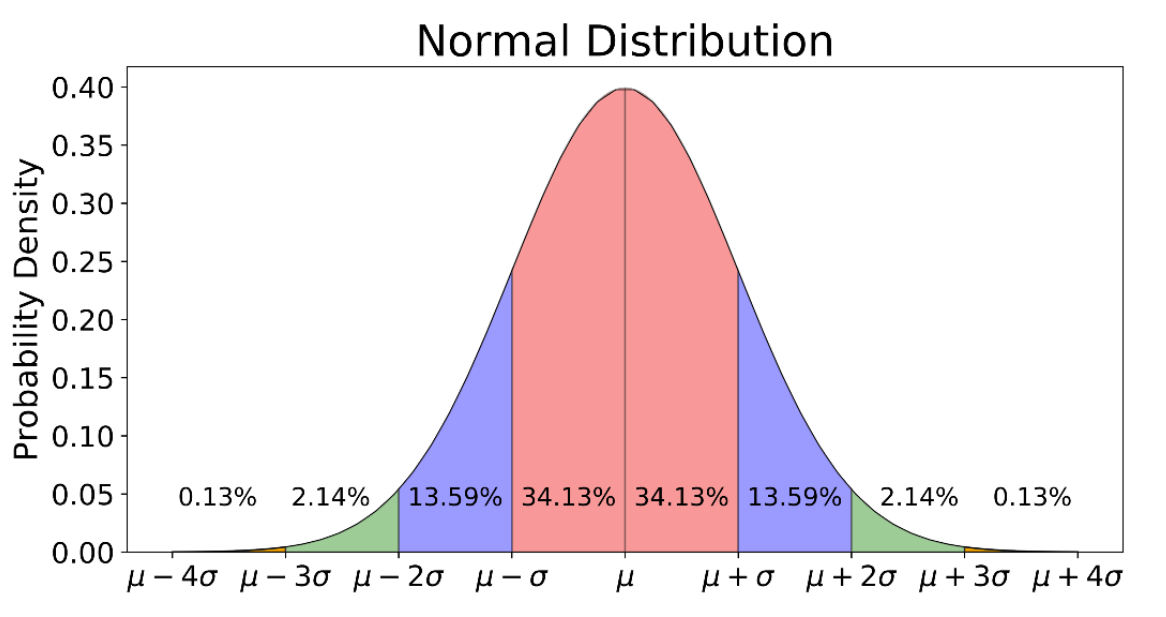

- Approximately 68% of all observations fall within one standard deviation of the mean.
- Approximately 95% of all observations fall within two standard deviations of the mean.
- Approximately 99.7% of all observations fall within three standard deviations of the mean.


### Example 1:
- Let the average sales of a particular product is 10000 and standard deviation is 2400. Then what is the probability of getting more than 12000 sales?
- Solution: Given that $\mu=10000$ and $\sigma=2400$. We need to compute $P(X>=12000)$

In [31]:
from scipy.stats import norm
# The syntax: norm.cdf(p, μ, σ) 
(1 - norm.cdf(12000,10000,2400)).round(3)

0.202

##### Business Inference:
- When we know that average sales is 10000 with a standard deviation of 2400, then the chances of having more than 12000 sales is around 20.23%

In [32]:
# What is the probability of getting fewer than 9200 sales?
norm.cdf(9200,10000,2400).round(3)

0.369

In [33]:
# What is the probability of getting between 9000 to 12000 sales?
(norm.cdf(12000,10000,2400)-norm.cdf(9000,10000,2400)).round(3)

0.459

##### Risk measurement using Normal distribution
- Consider a stock with returns $\mu=10$, $\sigma=5$. What are the chances that the returns will be < 0?

In [34]:
norm.cdf(0,10,5).round(3)

0.023

##### Business Inference:
- Given that, as per the past performance, the returns on the stock is 10% with the standard of deviation of 5% What is the chance of you loosing the money (returns is less than 0%).
- The chance of you loosing your money is 0.023. That is, it is around 2.3%

- What are the chances of losing money when std=10%?

In [30]:
norm.cdf(0,10,10)

0.15865525393145707

As standard deviation of the distribution increases the risk of losing money increases.

### Example 2:
A monthly balance in the bank account of credit card holders is assumed to be normally distributed with mean 500USD and variance 100USD. 
- What is the probability that the balance can be more than  513.5USD?
- If there are 1000 customers, 
    - how many customers will have account balance more than 513.5 USD?
    - How many people will have less than 520 USD as their account balance?



In [36]:
mu= 500
var= 100
sd= 10

In [37]:
(1-norm.cdf(513.5, mu, sd)).round(3)

0.089

In [38]:
((1-norm.cdf(513.5, 500, 10))*1000).round(3)

88.508

In [39]:
(norm.cdf(520, 500, 10)*1000).round(3)

977.25